# Исследование данных о продажах игр

**Описание проекта**

Из открытых источников нам доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы. Требуется выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цели и задачи**

- Выявление закономерностей, определяющих успешность игр
- Составление портрета пользователя по каждому региону
- Проверка статистических гипотез
- Составление рекомендаций для планирования рекламных кампаний на следующий год

**Описание данных**

В нашем распоряжении один датасет: 

`games.csv` — исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Структура `games.csv`:

- `Name` — название игры  
- `Platform` — платформа  
- `Year_of_Release` — год выпуска  
- `Genre` — жанр игры  
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
- `EU_sales` — продажи в Европе (миллионы проданных копий)  
- `JP_sales` — продажи в Японии (миллионы проданных копий)  
- `Other_sales` — продажи в других странах (миллионы проданных копий)  
- `Critic_Score` — оценка критиков (максимум 100)  
- `User_Score` — оценка пользователей (максимум 10)  
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

*Данные за 2016 год могут быть неполными.*

**План анализа данных**

[Изучение информации о данных](#1)  
  - [Загрузка и  данных](#1.1)
  - [Предобработка данных](#1.2)

[Анализ данных](#2)
  - [График количества выпущенных игр по годам](#2.1)
  - [График продаж по топ-5 платфомам](#2.2)
  - [График продаж по платфомам за актуальный период исследования](#2.3)
  - [График диаграмм размаха по продажам топ-5 платформ](#2.4)
  - [Графики корреляций количества продаж от оценки критиков  и пользователей по топ-3 платформам](#2.5)
  - [График распределения медианного количества продаж игр по жанрам](#2.6)
[Составление портрета пользователя каждого региона](#3)
  - [График популярности платформ в регионах](#3.1)
  - [График популярности жанров в регионах](#3.2)
  - [График популярности рейтингов ESRB в регионах](#3.3)

[Проверка гипотез](#4)
  - [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#4.1)
  - [Средние пользовательские рейтинги жанров Action и Sports разные](#4.2)
  
[Вывод](#5)

## Изучение информации о данных <a id=1></a>

### Загрузка данных  <a id=1.1></a>

In [1]:
#импортируем библиотеки
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from scipy import stats as st

In [2]:
def get_df(file_name:str, sep=','):
    '''Функция получения датасета.  
    
    Пытается получить датасет из трех директорий:  
    - из текущей папки;  
    - из папки `datasets`;  
    - из папки `../datasets`.'''
    path_1 = os.path.join('datasets', file_name)
    path_2 = os.path.join('../datasets', file_name)
    if os.path.exists(file_name):
        df = pd.read_csv(file_name, sep=sep)
        return df
    elif os.path.exists(path_1):
        df = pd.read_csv(path_1, sep=sep)
        return df
    elif os.path.exists(path_2):
        df = pd.read_csv(path_2, sep=sep)
        return df
    else:
        print('File is not found')

In [3]:
#загружаем данные
df = get_df('games.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Предобработка данных <a id=1.2></a>

In [6]:
#приведем названия колонок к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
#посмотрим дубликаты
df.duplicated().sum()

0

In [8]:
#посмотрим неполные дубликаты
df.duplicated(subset=['name', 'genre', 'platform', 'year_of_release']).sum()

2

In [9]:
#удаляем их
df = df.drop_duplicates(subset=['name', 'genre', 'platform', 'year_of_release'])

In [10]:
#посмотрим пропуски
df.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [11]:
#наглядная визуальзация пропусков в данных
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


<Axes: >

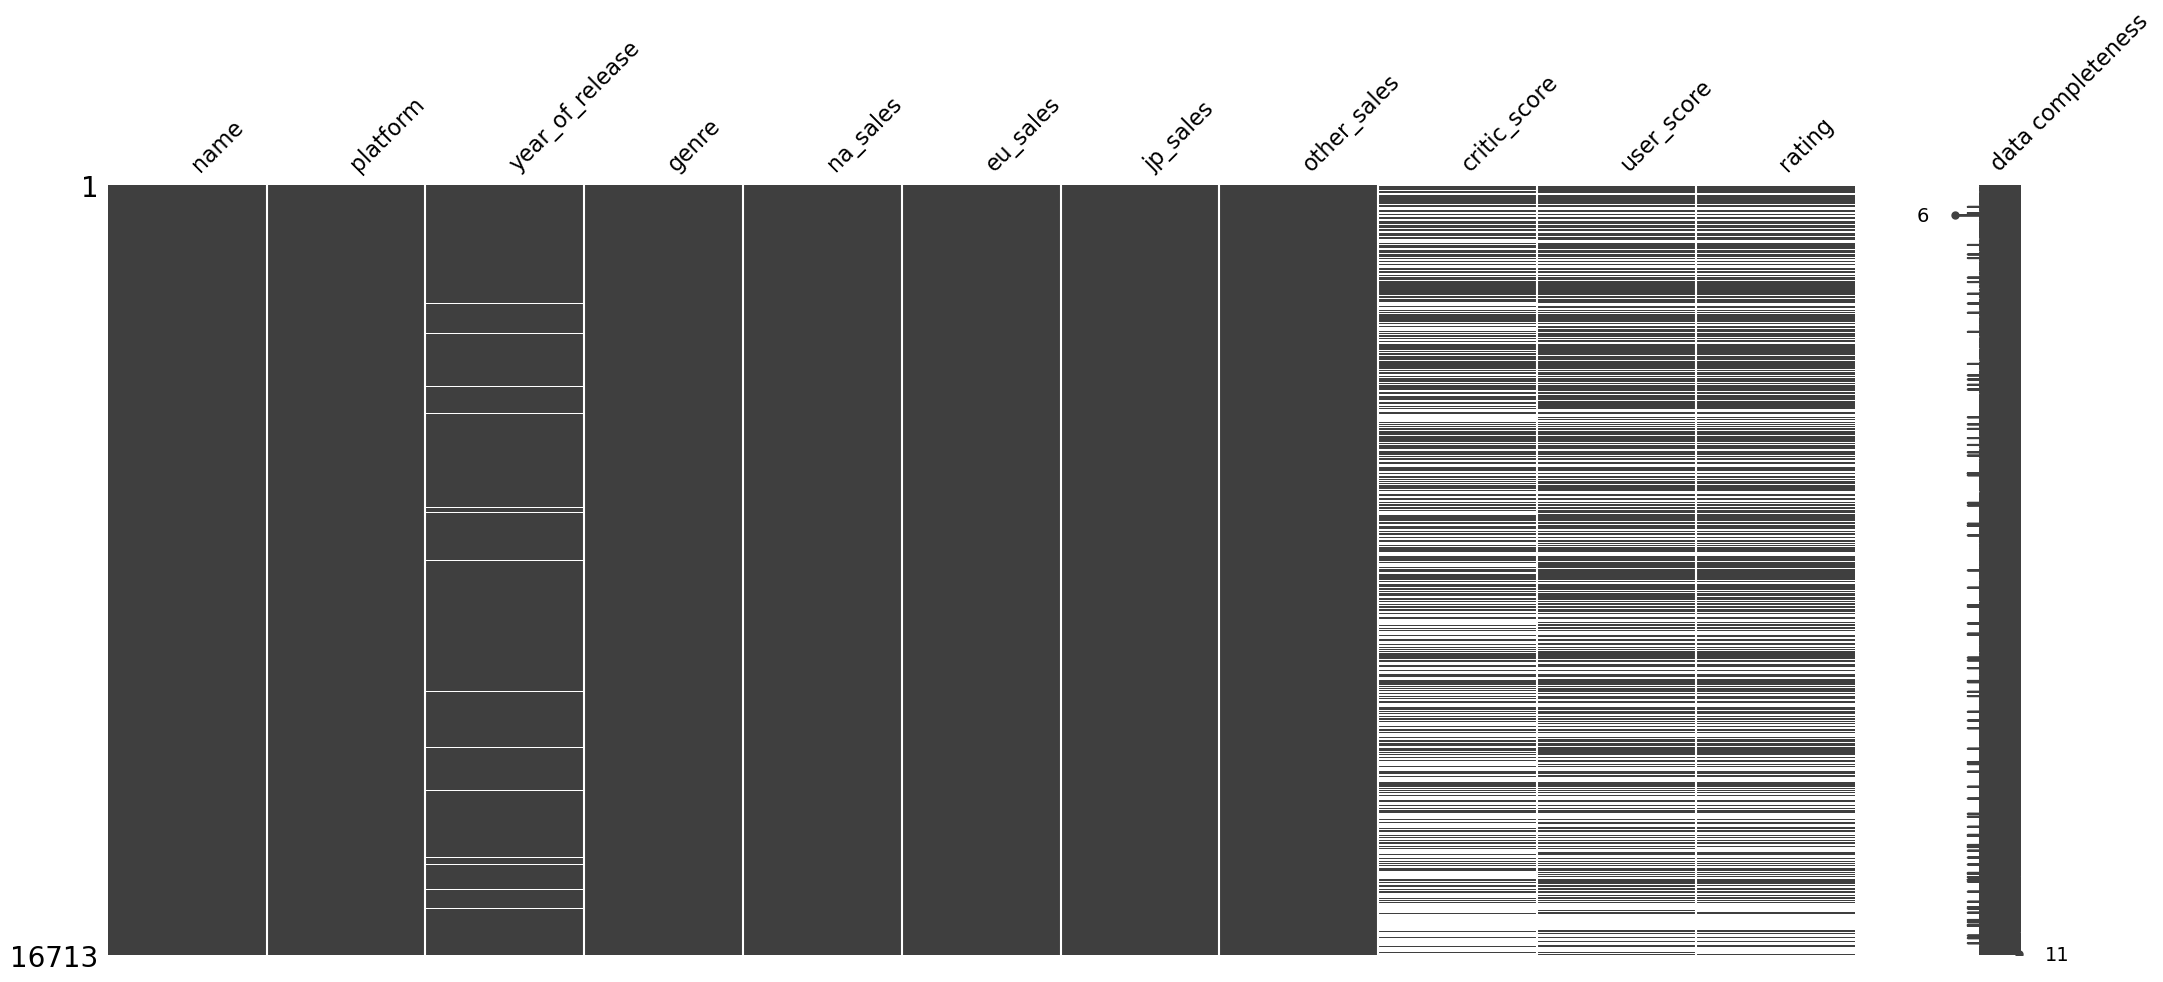

In [12]:
#еще один способ визуальзации пропусков в данных
msno.matrix(df, labels=True)

In [13]:
#удалим пропуски в столбцах name, year_of_release, genre
df = df.dropna(subset=['name', 'year_of_release', 'genre'])

In [14]:
#заменим значения tbd в столбце user_score на NaN
df['user_score'] = df['user_score'].replace({'tbd':np.NaN})

In [15]:
#заменим отсутствующие значения в столбцах genre и rating на значение unknown
df['genre'] = df['genre'].fillna('unknown') 
df['rating'] = df['rating'].fillna('unknown')

In [16]:
#изменим типы данных
df['year_of_release'] = df['year_of_release'].astype('int32')
df['user_score'] = df['user_score'].astype('float64')

In [17]:
#приведем все названия к нижнему регистру и проверим на неявные дубликаты
columns_to_lower = ['name', 'platform', 'genre']
for i in columns_to_lower:
    df[i] = df[i].str.lower()
df.duplicated().sum()

0

In [18]:
#столбец rating к нижнему регистру не приводили, проверим его отдельно
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [19]:
#добавим столбец total_sales с значением суммарного количества продаж во всех регионах
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

В ходе предобработки выполнено:

Удалены пропуски в столбцах `name`, `year_of_release`, `genre`. Пропусков в этих колонках крайне мало, можем смело удалять.

Значения `tbd` в столбце `rating` заменены на `NaN` т.к. фактически это значение отсутствует.

Пропуски в столбцах `genre` и `rating` заменены на значение `unknown`. 

Пропуски в столбцах `critic_score`, `user_score` оставляем без изменений так как заменять эти значения медианой или средним не показательно, рейтинг одной игры никак не влияет на рейтинг другой, эти данные не связаны. 

Пропуски в столбцах могли появиться из-за человеческого фактора: недостатка информации об играх, недостаточно глубокого сбора информации и т.д. Также возможны технические сбои: нарпимер на каком-либо этапе работы с данными.

Заменен тип данных в столбце `year_of_release` на `int32` т.к. год выпуска это целочисленное значение

Заменен тип данных в столбце `user_score` на `float64` т.к. пользовательский рейтинг это количественная переменная

Добавлен столбец `total_sales` с значением суммарного количества продаж во всех регионах.

## Исследовательский анализ данных <a id=2></a>

### График количества выпущенных игр по годам <a id=2.1></a>

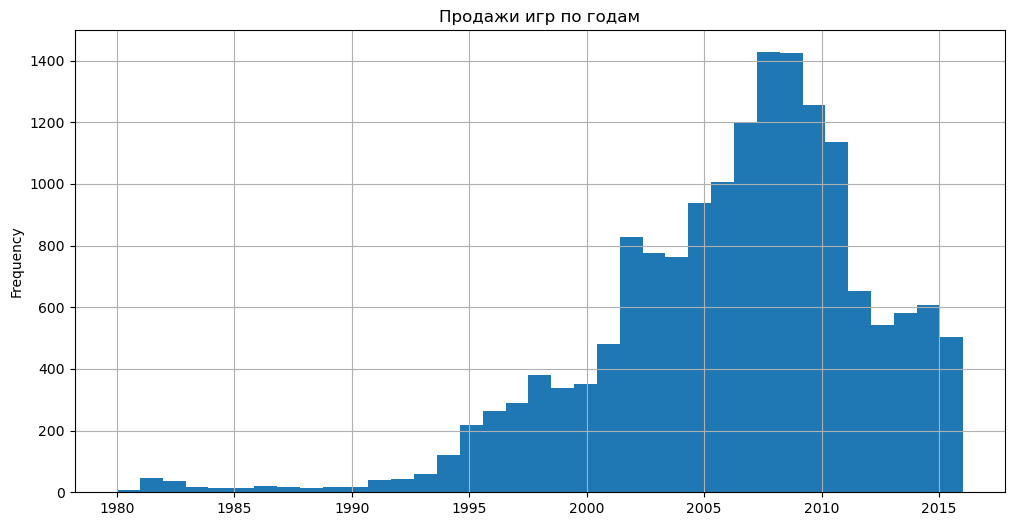

In [20]:
#построим гистограмму с количеством выпущенных игр по годам
df['year_of_release'].plot(kind='hist', 
                           bins=37, 
                           title='Продажи игр по годам', 
                           grid=True, 
                           xlabel='Год', 
                           ylabel='Продажи', 
                           figsize=(12,6))
plt.show()

Пик производства игр приходится на 2008-2009 годы, к 2015 количество выпущенных игр упало более чем в два раза. Видно, что активный рост индустрии начался в середине 1990х годов.

### График продаж по топ-5 платфомам <a id=2.2></a>

In [21]:
#делаем срез по рынку игр после 2000 года
games_after_2000_df = df[df['year_of_release'] > 2000]
#выбираем топ-5 платформ по суммарному количеству продаж за все время
top_5_platform_ever_list = (list(df
                                 .groupby('platform')
                                 .agg({'total_sales':'sum'})
                                 .sort_values('total_sales', ascending=False)[:5]
                                 .index
                                )
                           )

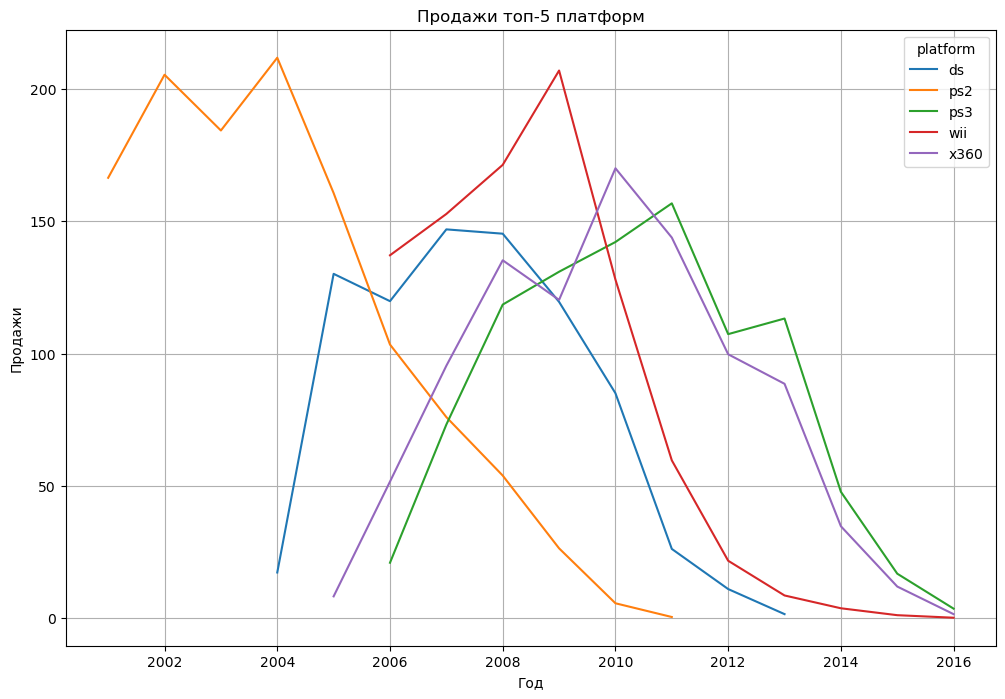

In [22]:
#строим график продаж по топ-5 платфомам
(games_after_2000_df.query('platform in @top_5_platform_ever_list')
.pivot_table(index='year_of_release', 
             columns='platform', 
             values='total_sales', 
             aggfunc='sum')
.plot(title='Продажи топ-5 платформ', 
      figsize=(12,8),
      xlabel='Год',
      ylabel='Продажи',
      grid=True))
plt.show()

Каждая платформа от момента создания и до падения продаж до минимума существует около 10 лет.

### График продаж по платфомам за актуальный период исследования <a id=2.3></a>

Примем за актуальный период исследования данные за последние полные 3 года: 2013-2015 (данные за 2016 г. из условия не полные)

In [23]:
#делаем срез по годам, принятым за актуальный преиод
actual_period_df = df[(df['year_of_release'] < 2016) & (df['year_of_release'] > 2012)]

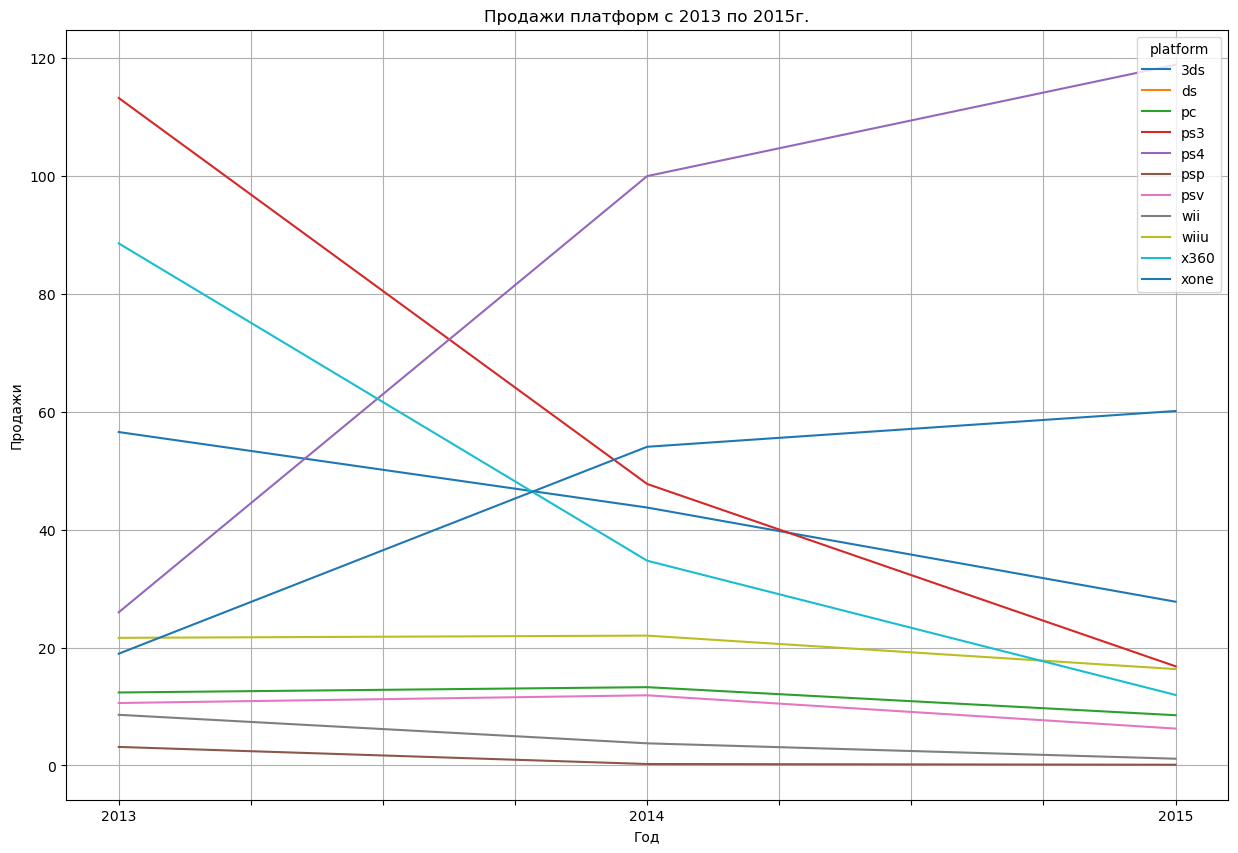

In [24]:
plot = actual_period_df.copy()
plot['year_of_release'] = plot['year_of_release'].astype('str')
(plot
 .pivot_table(index='year_of_release', 
              columns='platform', 
              values='total_sales', 
              aggfunc='sum'
             )
 .plot(title='Продажи платформ c 2013 по 2015г.', 
       figsize=(15,10),
       xlabel='Год',
       ylabel='Продажи',
       grid=True))
plt.show()

Из графика видно, что платформы PS4 и XOne лидируют по продажам, они же самые потенциально прибыльные. Платформы PS3, X360, 3DS показывают падение продаж, остальные платформы стагнируют.

### График диаграмм размаха по продажам топ-5 платформ <a id=2.4></a>

In [25]:
#построим диаграмму размаха по глобальным продажам игр в разбивке по каждой платформе из топ5
top_5_platform_actual_period_list = (list(actual_period_df
                                          .groupby('platform')
                                          .agg({'total_sales':'sum'})
                                          .sort_values('total_sales', ascending=False)[:5]
                                          .index
                                         )
                                    )
top_5_platform_df = actual_period_df.query('platform in @top_5_platform_actual_period_list')

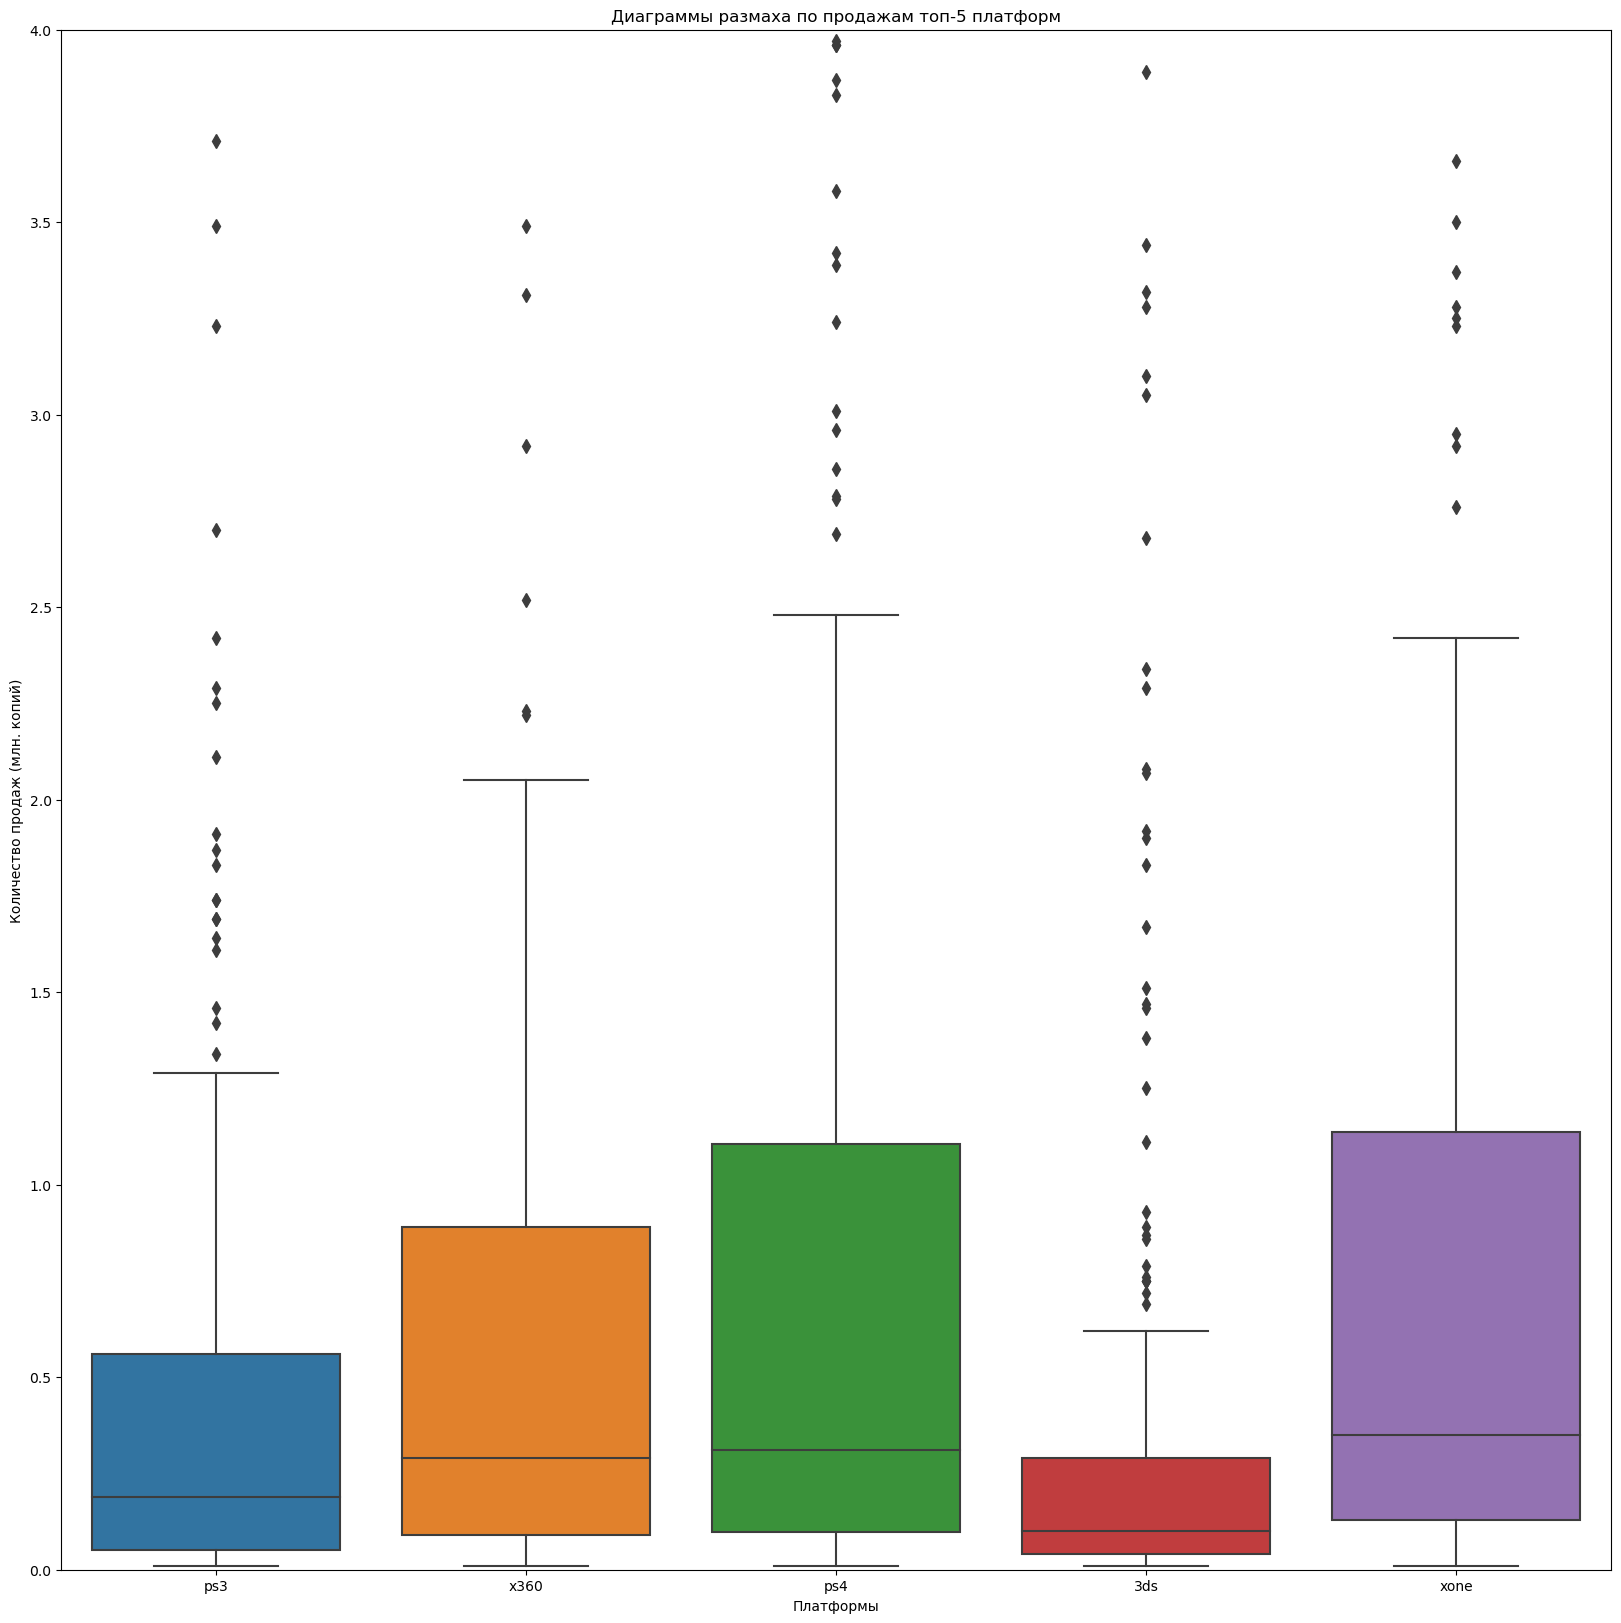

In [26]:
#строим график диаграмм размаха по продажам топ-5 платформ
plt.figure(figsize=(20, 20))
ax = sns.boxplot(x='platform', 
                 y='total_sales', 
                 data=top_5_platform_df, 
                 fliersize=7)
ax.set_title('Диаграммы размаха по продажам топ-5 платформ')
ax.set_xlabel('Платформы')
ax.set_ylabel('Количество продаж (млн. копий)')
ax.set_ylim(0,4)
plt.show()

In [27]:
#в дополнение к графику делаем сводную описательной статистики по продажам топ-5 платформ
describe_pivot_columns = (top_5_platform_df
                          .query('platform == @top_5_platform_actual_period_list[0]')['total_sales']
                          .describe()
                          .index
                         )
describe_pivot_data = []
for i in top_5_platform_actual_period_list:
    describe_pivot_data.append(list(top_5_platform_df.query('platform == @i')['total_sales'].describe()))

In [28]:
pd.DataFrame(data=describe_pivot_data, 
             columns=describe_pivot_columns, 
             index=top_5_platform_actual_period_list)

,count,mean,std,min,25%,50%,75%,max
ps4,228.0,1.074079,1.899788,0.01,0.0975,0.31,1.1050,14.63
ps3,307.0,0.579251,1.530432,0.01,0.0500,0.19,0.5600,21.05
x360,173.0,0.781965,1.715684,0.01,0.0900,0.29,0.8900,16.27
xone,160.0,0.832313,1.182243,0.01,0.1300,0.35,1.1375,7.39
3ds,257.0,0.498482,1.431660,0.01,0.0400,0.10,0.2900,14.60


- На платформе **PS3** медианным значением проданных копий является 190 тыс., нормальный размах - от 50 тыс. до 560 тыс. копий, выбросы присутствуют, что говорит о высокой популярности отдельных игр.  
- На **XONE** медианное значение проданных копий составляет 350 тыс., нормальный размах - от 130 тыс. до 1137 тыс. копий, выбросы присутствуют, что говорит о высокой популярности отдельных игр.  
- На **3DS** медианное значение проданных копий 100 тыс., нормальный размах - от 40 тыс. до 290 тыс. копий, присустсвует много выбросов, что говорит о высокой популярности отдельных игр.  
- На **PS4** медианное значение проданных копий 310 тыс., нормальный размах - от 10 тыс. до 1.1 млн копий, присустсвует много выбросов, что говорит о высокой популярности отдельных игр.  
- На **X360** медианное значение проданных копий 290 тыс., нормальный размах - от 90 тыс. до 890 тыс. копий, выброы присутствуют, что говорит о высокой популярности отдельных игр.  

### Графики корреляций количества продаж от оценки критиков  и пользователей по топ-3 платформам <a id=2.5></a>

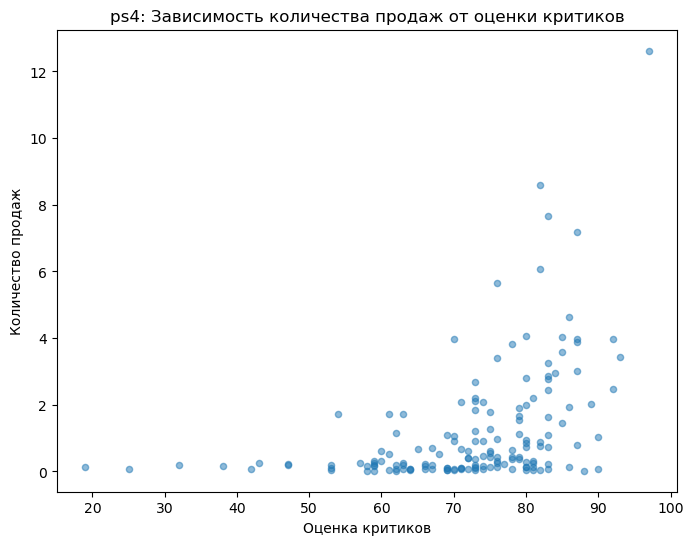

Корреляция количества продаж от оценки критиков: 0.4318482049982005


In [29]:
#посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
(top_5_platform_df
 .query('platform == @top_5_platform_actual_period_list[0]')
 .plot(x='critic_score', 
       y='total_sales', 
       kind='scatter', 
       alpha=0.5, 
       xlabel='Оценка критиков',
       ylabel='Количество продаж',
       title=f'{top_5_platform_actual_period_list[0]}: Зависимость количества продаж от оценки критиков',
       figsize=(8,6)
      )
)
plt.show()
print('Корреляция количества продаж от оценки критиков:', 
      top_5_platform_df.query('platform == @top_5_platform_actual_period_list[0]')['total_sales']
      .corr(top_5_platform_df
            .query('platform == @top_5_platform_actual_period_list[0]')['critic_score']
           )
     )

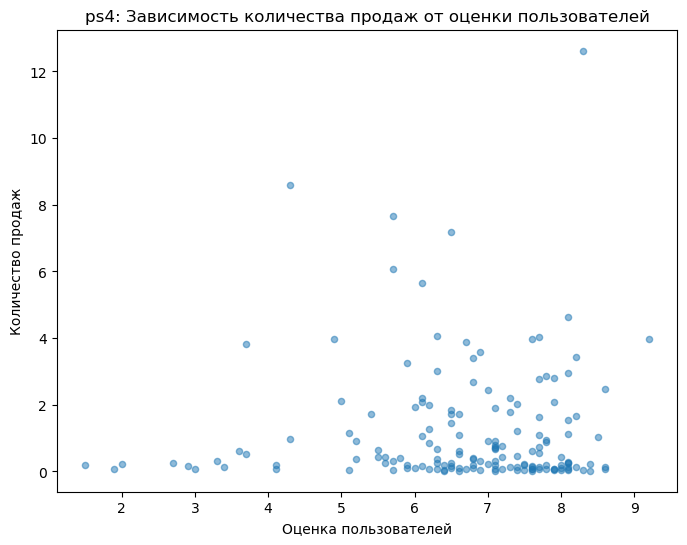

Корреляция количества продаж от оценки пользователей: 0.024230832360622553


In [30]:
(top_5_platform_df
 .query('platform == @top_5_platform_actual_period_list[0]')
 .plot(x='user_score', 
       y='total_sales', 
       kind='scatter', 
       alpha=0.5, 
       xlabel='Оценка пользователей',
       ylabel='Количество продаж',
       title=f'{top_5_platform_actual_period_list[0]}: Зависимость количества продаж от оценки пользователей',
       figsize=(8,6)
      )
)
plt.show()
print('Корреляция количества продаж от оценки пользователей:', 
      top_5_platform_df.query('platform == @top_5_platform_actual_period_list[0]')['total_sales']
      .corr(top_5_platform_df
            .query('platform == @top_5_platform_actual_period_list[0]')['user_score']
           )
     )

Оценка критиков сильнее коррелирует с количеством проданных копий, чем оценка пользователей. Корреляция количества продаж с оценкой пользователей равна 0.02, что говорит о почти полном отсутствии зависимостей этих показателей.

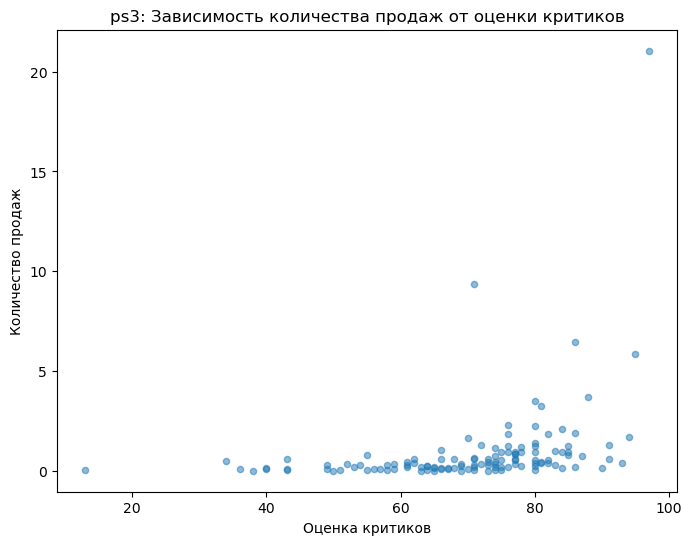

Корреляция количества продаж от оценки критиков: 0.3342853393371919


In [31]:
#посмотрим те же показатели для других платформ
(top_5_platform_df
 .query('platform == @top_5_platform_actual_period_list[1]')
 .plot(x='critic_score', 
       y='total_sales', 
       kind='scatter', 
       alpha=0.5, 
       xlabel='Оценка критиков',
       ylabel='Количество продаж',
       title=f'{top_5_platform_actual_period_list[1]}: Зависимость количества продаж от оценки критиков',
       figsize=(8,6)
      )
)
plt.show()
print('Корреляция количества продаж от оценки критиков:', 
      top_5_platform_df.query('platform == @top_5_platform_actual_period_list[1]')['total_sales']
      .corr(top_5_platform_df
            .query('platform == @top_5_platform_actual_period_list[1]')['critic_score']
           )
     )

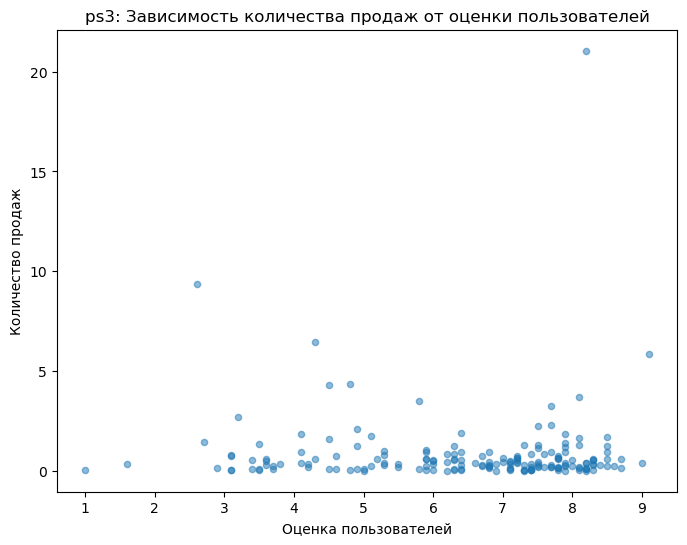

Корреляция количества продаж от оценки пользователей: -0.01633272834351343


In [32]:
(top_5_platform_df
 .query('platform == @top_5_platform_actual_period_list[1]')
 .plot(x='user_score', 
       y='total_sales', 
       kind='scatter', 
       alpha=0.5,   
       xlabel='Оценка пользователей',
       ylabel='Количество продаж',
       title=f'{top_5_platform_actual_period_list[1]}: Зависимость количества продаж от оценки пользователей',
       figsize=(8,6)
      )
)
plt.show()
print('Корреляция количества продаж от оценки пользователей:', 
      top_5_platform_df.query('platform == @top_5_platform_actual_period_list[1]')['total_sales']
      .corr(top_5_platform_df
            .query('platform == @top_5_platform_actual_period_list[1]')['user_score']
           )
     )

По платформе PS3 видим примерно похожие показатели с PS4: оценка критиков немного коррелирует с количеством продаж, зависимость оценки пользователей и количества продаж отсутствует.

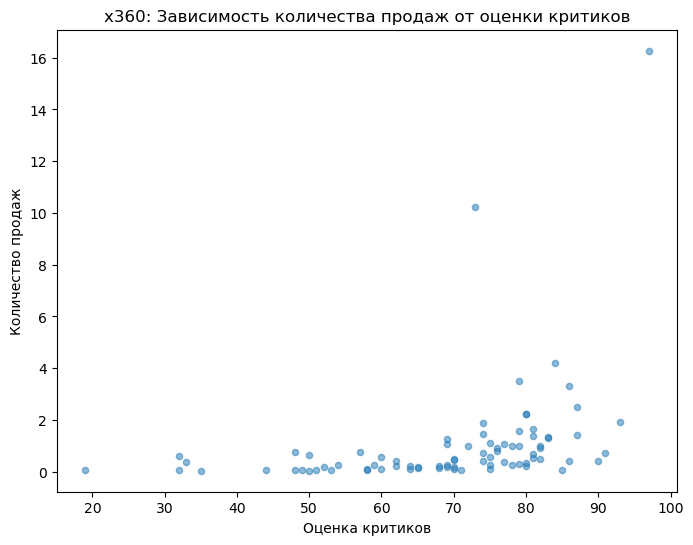

Корреляция количества продаж от оценки критиков: 0.3503445460228664


In [33]:
(top_5_platform_df
 .query('platform == @top_5_platform_actual_period_list[2]')
 .plot(x='critic_score', 
       y='total_sales', 
       kind='scatter', 
       alpha=0.5, 
       xlabel='Оценка критиков',
       ylabel='Количество продаж',
       title=f'{top_5_platform_actual_period_list[2]}: Зависимость количества продаж от оценки критиков',
       figsize=(8,6)
      )
)
plt.show()
print('Корреляция количества продаж от оценки критиков:', 
      top_5_platform_df.query('platform == @top_5_platform_actual_period_list[2]')['total_sales']
      .corr(top_5_platform_df
            .query('platform == @top_5_platform_actual_period_list[2]')['critic_score']
           )
     )

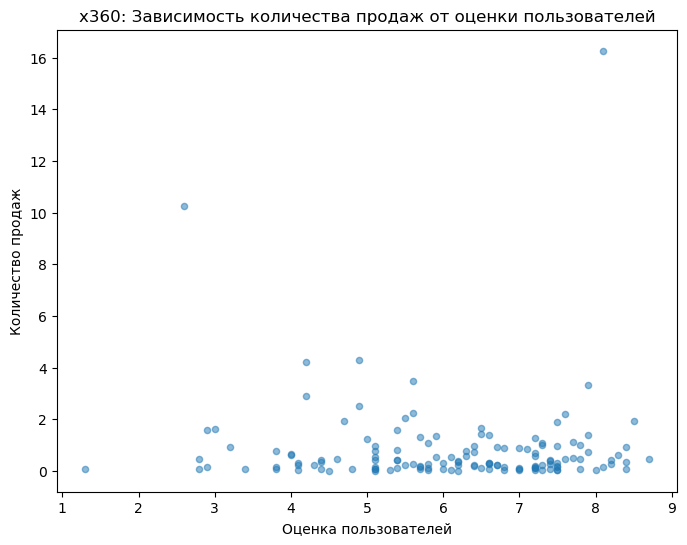

Корреляция количества продаж от оценки пользователей: -0.034562454100238206


In [34]:
(top_5_platform_df
 .query('platform == @top_5_platform_actual_period_list[2]')
 .plot(x='user_score', 
       y='total_sales', 
       kind='scatter', 
       alpha=0.5, 
       xlabel='Оценка пользователей',
       ylabel='Количество продаж',
       title=f'{top_5_platform_actual_period_list[2]}: Зависимость количества продаж от оценки пользователей',
       figsize=(8,6)
      )
)
plt.show()
print('Корреляция количества продаж от оценки пользователей:', 
      top_5_platform_df.query('platform == @top_5_platform_actual_period_list[2]')['total_sales']
      .corr(top_5_platform_df
            .query('platform == @top_5_platform_actual_period_list[2]')['user_score']
           )
     )

По платформе X360 видим похожие показатели с предыдущими платформами. Оценка пользователей не коррелирует с количеством продаж, Зависимость оценки критиков и количества продаж также присутствует на уровне ниже среднего.

### График распределения медианного количества продаж игр по жанрам <a id=2.6></a>

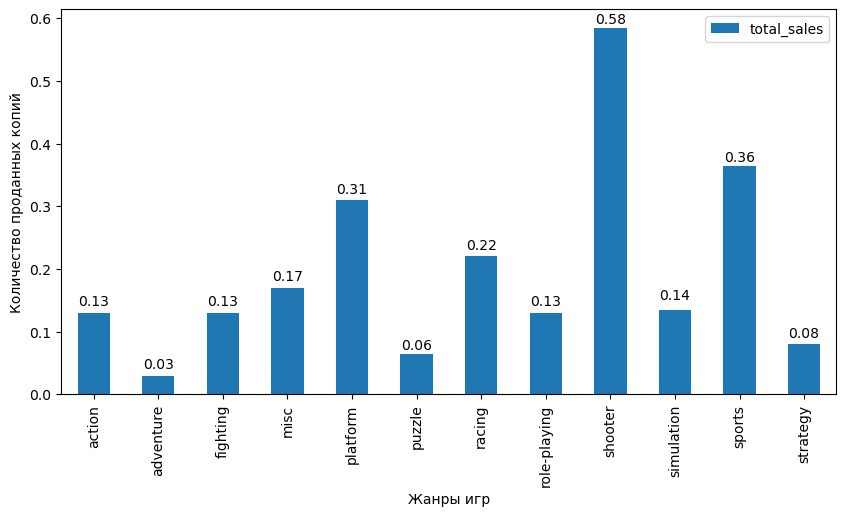

In [35]:
#посмотрим на общее распределение игр по жанрам
genre_pivot = actual_period_df.pivot_table(index='genre', 
                                           values='total_sales', 
                                           aggfunc='median')

ax = genre_pivot.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Жанры игр')
plt.ylabel('Количество проданных копий')
for p in ax.patches:
    value = round(p.get_height(), 2)
    ax.annotate(str(value), 
                (p.get_x() + p.get_width() / 2, value),
                ha='center', 
                va='center', 
                xytext=(0, 8), 
                textcoords='offset points'
               )
plt.show()

Самым стабильно популярным жанром по всем платформам в мире являются шутеры, медианное значение продаж игр этого жанра - 580 тыс. копий. Менее популярны спортивные симуляторы и платформеры - 360 и 310 тыс. копий соответственно. Самые непопулярные жанры - приключенческие игры и пазлы - 30 и 60 тыс. проданных копий.

## Составление портрета пользователя каждого региона  <a id=3></a>

In [36]:
#напишем функцию other_platform, заменяющую названия платформ, не входящих в список top_5 на 'other'
def other_platform(top_5, df):
    '''Функция возвращает датафрейм с измененной маркировкой названий платформ.
    
    Названия платформ, входящих в топ-5 по региону остаются без изменений, остальные платформы маркируются как `other`'''
    platform_to_replace_list = []
    for k in df['platform'].unique():
        if k not in top_5:
            if k not in platform_to_replace_list:
                platform_to_replace_list.append(k)
    other_platform_df = df.assign(platform=df['platform'].replace(platform_to_replace_list, 'other'))
    return other_platform_df

In [37]:
#создаем список топ-5 платформ в регионе NA
top_5_na_platform_list = (list(actual_period_df
                               .groupby(by='platform')['na_sales']
                               .sum()
                               .sort_values(ascending=False)[:5]
                               .index
                              )
                         )

In [38]:
#создадим датафрейм top_platforms_na_df с помощью функции other_platform
top_platforms_na_df = other_platform(top_5_na_platform_list, actual_period_df)

In [39]:
#регион EU
top_5_eu_platform_list = (list(actual_period_df
                               .groupby(by='platform')['eu_sales']
                               .sum()
                               .sort_values(ascending=False)[:5]
                               .index
                              )
                         )

In [40]:
#создадим датафрейм top_platforms_eu_df с помощью функции other_platform
top_platforms_eu_df = other_platform(top_5_eu_platform_list, actual_period_df)

In [41]:
#регион JP
top_5_jp_platform_list = (list(actual_period_df
                               .groupby(by='platform')['jp_sales']
                               .sum()
                               .sort_values(ascending=False)[:5]
                               .index
                              )
                         )

In [42]:
#создадим датафрейм top_platforms_eu_df с помощью функции other_platform
top_platforms_jp_df = other_platform(top_5_jp_platform_list, actual_period_df)

### График популярности платформ в регионах <a id=3.1></a>

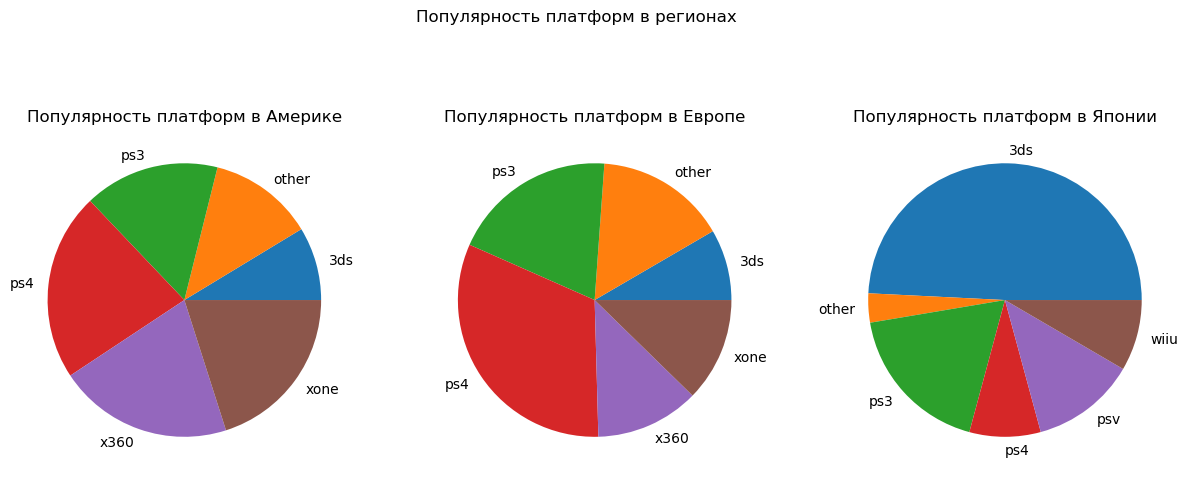

In [43]:
#построим графики
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))

top_platforms_na_df.groupby('platform')['na_sales'].sum().plot(kind='pie', 
                                                               title='Популярность платформ в Америке', 
                                                               ylabel='', 
                                                               ax=ax1)
top_platforms_eu_df.groupby('platform')['eu_sales'].sum().plot(kind='pie', 
                                                               title='Популярность платформ в Европе', 
                                                               ylabel='', 
                                                               ax=ax2)
top_platforms_jp_df.groupby('platform')['jp_sales'].sum().plot(kind='pie', 
                                                               title='Популярность платформ в Японии', 
                                                               ylabel='', 
                                                               ax=ax3)

plt.suptitle('Популярность платформ в регионах')

plt.show()

В Америке популярность платформ поровну распределена между консолями: треть рынка составляют консоли PS4 и PS3, чуть больше трети консоли Xbox 360 и Xbox One. Остальная часть рынка приходится на консоль 3DS и категорию "другие".

В Европе популярность платформ похожа на Америку, однако доля консолей от Sony (PS4 и PS3) выше, а консолей от Microsoft (Xbox 360 и Xbox One) ниже.

В Японии популярность не похожа на Америку и Европу, почти половину рынка занимает консоль 3DS. Также в топ-5 Японии присутствует консоль Wii U и PS Vita, и отсутствуют консоли от Microsoft (Xbox 360 и Xbox One).

In [44]:
#напишем функцию other_genre, заменяющую названия жанров, не входящих в список top_5 на 'other'
def other_genre(top_5, df):
    '''Функция возвращает датафрейм с измененной маркировкой названий жанров.
    
    Названия жанров, входящих в топ-5 по региону остаются без изменений, остальные жанры маркируются как `other`'''
    genre_to_replace_list = []
    for k in df['genre'].unique():
        if k not in top_5:
            if k not in genre_to_replace_list:
                genre_to_replace_list.append(k)
    other_genre_df = df.assign(genre=actual_period_df['genre'].replace(genre_to_replace_list, 'other'))
    return other_genre_df

In [45]:
#создаем список топ-5 жанров в регионе NA
top_5_na_genre_list = (list(actual_period_df
                               .groupby(by='genre')['na_sales']
                               .sum()
                               .sort_values(ascending=False)[:5]
                               .index
                              )
                         )

In [46]:
#создадим переменную top_genre_na с помощью функции other_genre
top_genre_na_df = other_genre(top_5_na_genre_list, actual_period_df)

In [47]:
#регион EU
top_5_eu_genre_list = (list(actual_period_df
                               .groupby(by='genre')['eu_sales']
                               .sum()
                               .sort_values(ascending=False)[:5]
                               .index
                              )
                         )

In [48]:
top_genre_eu_df = other_genre(top_5_eu_genre_list, actual_period_df)

In [49]:
#регион JP
top_5_jp_genre_list = (list(actual_period_df
                               .groupby(by='genre')['jp_sales']
                               .sum()
                               .sort_values(ascending=False)[:5]
                               .index
                              )
                         )

In [50]:
top_genre_jp_df = other_genre(top_5_jp_genre_list, actual_period_df)

### График популярности жанров в регионах <a id=3.2></a>

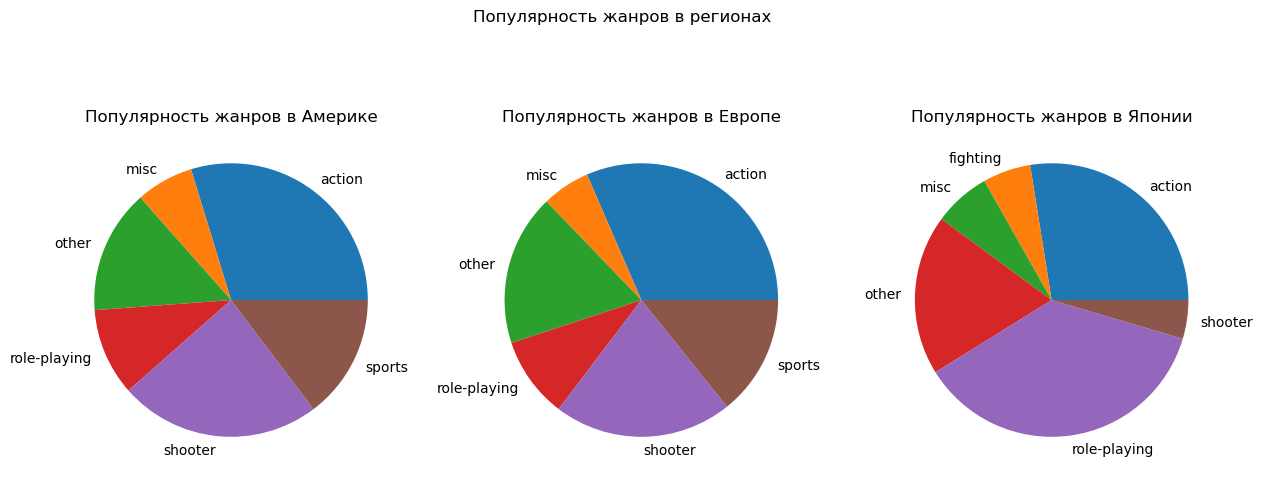

In [51]:
#построим графики
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))

top_genre_na_df.groupby('genre')['na_sales'].sum().plot(kind='pie', 
                                                        title='Популярность жанров в Америке', 
                                                        ylabel='', 
                                                        ax=ax1)
top_genre_eu_df.groupby('genre')['eu_sales'].sum().plot(kind='pie', 
                                                        title='Популярность жанров в Европе', 
                                                        ylabel='', 
                                                        ax=ax2)
top_genre_jp_df.groupby('genre')['jp_sales'].sum().plot(kind='pie', 
                                                        title='Популярность жанров в Японии', 
                                                        ylabel='', 
                                                        ax=ax3)

plt.suptitle('Популярность жанров в регионах')
plt.show()

В Америке и Европе схожие рынки по жанрам игр: в обоих преобладают жанры action и shooter, чуть менее популярны спортивные игры и RPG. В Европе немного чаще играют в игры жругих жанров.

В Японии самый популярный жанр - RPG. Игры жанра action на втором месте по популярности. Также, в Японии чаще чем в других регионах играют в игры жанров, не вошедших в топ-5 по региону.

### График популярности рейтингов ESRB в регионах <a id=3.3></a>

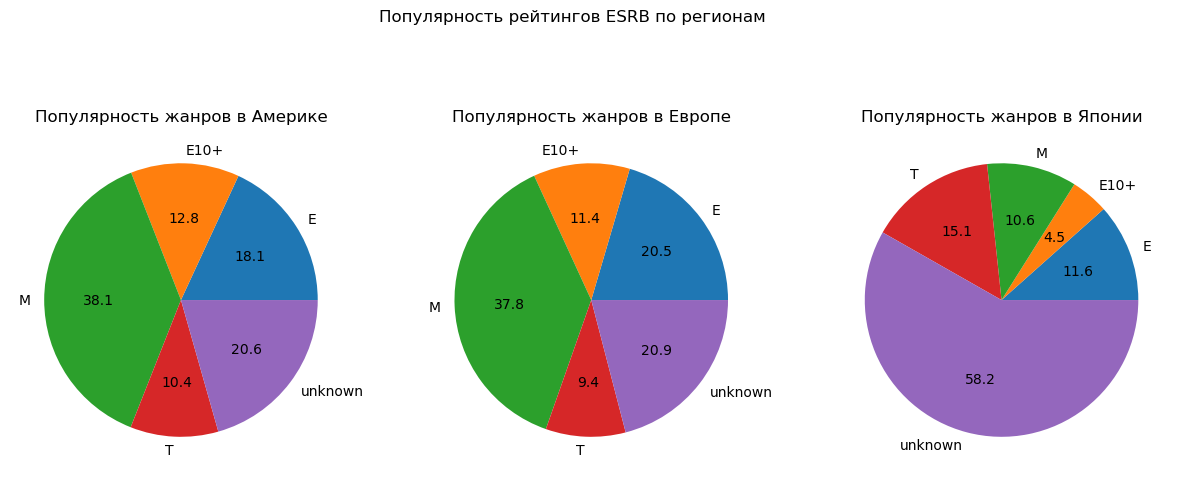

In [52]:
#построим круговые диаграммы популярности рейтингов ESRB по регионам
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))

actual_period_df.groupby('rating').agg({'na_sales':'sum'})['na_sales'].plot(kind='pie', 
                                                                            title='Популярность жанров в Америке', 
                                                                            ylabel='', 
                                                                            autopct='%.1f', 
                                                                            ax=ax1
                                                                           )
actual_period_df.groupby('rating').agg({'eu_sales':'sum'})['eu_sales'].plot(kind='pie', 
                                                                            title='Популярность жанров в Европе', 
                                                                            ylabel='', 
                                                                            autopct='%.1f',
                                                                            ax=ax2
                                                                           )
actual_period_df.groupby('rating').agg({'jp_sales':'sum'})['jp_sales'].plot(kind='pie', 
                                                                            title='Популярность жанров в Японии', 
                                                                            ylabel='', 
                                                                            autopct='%.1f',
                                                                            ax=ax3
                                                                           )

plt.suptitle('Популярность рейтингов ESRB по регионам')
plt.show()

В Европе и Америке рынки схожи, почти 40% игр продаются с рейтингом M («Mature», 17+). Наименьшую долю рынка занимают игры с рейтингом T («Teen», 13+).

По региону Япония данные не полные, почти 60% игр с пропущенным значением рейтинга, однако в Японии рейтинг Т занимает вторую позицию по количеству копий с долей 15%, в отличие от других регионов.

## Проверка гипотез <a id=4></a>

Согласно техническому заданию требуется проверить две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <a id=4.1></a> 

Формулируем гипотезы:

> $H_0$ - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
>
> $H_1$ - средние пользовательские рейтинги платформ Xbox One и PC разные

In [53]:
#сделаем срезы по платформам и зададим пороговое значение alpha = 0.05
xone = actual_period_df.query('platform == "xone" and user_score > 0')
pc = actual_period_df.query('platform == "pc" and user_score > 0')
alpha = .05

In [54]:
#применяем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
results = st.ttest_ind(xone['user_score'], pc['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.2827494983260732
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не получилось, поэтому делаем вывод, что **средние пользовательские рейтинги платформ Xbox One и PC  одинаковые.**

### Средние пользовательские рейтинги жанров Action и Sports разные <a id=4.2></a> 

Формулируем гипотезы:

> $H_0$ - средние пользовательские рейтинги жанров Action и Sports одинаковые
>
> $H_1$ - средние пользовательские рейтинги жанров Action и Sports разные

In [55]:
action = actual_period_df.query('genre == "action" and user_score > 0')
sports = actual_period_df.query('genre == "sports" and user_score > 0')
alpha = .05

In [56]:
results = st.ttest_ind(action['user_score'], sports['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.157989291674005e-26
Отвергаем нулевую гипотезу


Нулевую гипотезу отвергаем, поэтому делаем вывод, что **средние пользовательские рейтинги жанров Action и Sports разные**

## Вывод  <a id=5></a> 

Рынок игровой индустрии быстро меняется. В проекте проведен анализ за поледние 3 года, более старые данные не показательны. 

**В ходе предобработки выполнено:**

- В ходе предобработки выполнено:
- Удалены пропуски в столбцах `name`, `year_of_release`, `genre`.
- Значения `tbd` в столбце `rating` заменены на NaN т.к. фактически это значение отсутствует.
- Пропуски в столбцах `genre` и `rating` заменены на значение `unknown`. 
- Заменен тип данных в столбце `year_of_release` на `int32` т.к. год выпуска это целочисленное значение
- Заменен тип данных в столбце `user_score` на `float64` т.к. пользовательский рейтинг это количественная переменная
- Добавлен столбец `total_sales` с значением суммарного количества продаж во всех регионах.

**В ходе исследовательского анализа установлено:**

- Каждая платформа от момента создания и до падения продаж до минимума существует около 10 лет.
- С 2013 года платформы PS4 и XOne лидируют по продажам, они же самые потенциально прибыльные. Платформы PS3, X360, 3DS показывают падение продаж, остальные платформы стагнируют.
- На диаграммах размаха по глобальным продажам у платформ PS4 и 3DS присустсвует много выбросов, что говорит о высокой популярности отдельных игр с определенной регулярностью их выпуска. На платформах PS3, PSV и X360 выбросы присутствуют, но их мало, что говорит о стабильности в продажах и высокой популярности отдельных игр.
- По трем популярным платформам оценка игр критиками слабо коррелирует с количеством их продаж, зависимость оценки пользователей и количества продаж почти отсутствует.
- Игры жанра action и shooter в мире являются самыми популярными, количество проданных копий составляет 291.8 и 194.8 млн копий соответственно. Жанры puzzle и strategy - самые непопулярные, количество их продаж составляет 3.2 и 9 млн. копий по всем платформам за актуальный период.

**Составлен портрет пользователя по каждому региону**

- В Америке популярность платформ поровну распределена между консолями: треть рынка составляют консоли PS4 и PS3, чуть больше трети консоли Xbox 360 и Xbox One. Остальная часть рынка приходится на консоль 3DS и категорию "другие". В Европе популярность платформ похожа на Америку, однако доля консолей от Sony (PS4 и PS3) выше, а консолей от Microsoft (Xbox 360 и Xbox One) ниже. В Японии популярность не похожа на Америку и Европу, почти половину рынка занимает консоль 3DS. Также в топ-5 Японии присутствует консоль Wii U и PS Vita, и отсутствуют консоли от Microsoft (Xbox 360 и Xbox One).
- В Америке и Европе схожие рынки по жанрам игр: в обоих преобладают жанры action и shooter, чуть менее популярны спортивные игры и RPG. В европе немного чаще играют в игры жругих жанров. В Японии самый популярный жанр - RPG. Игры жанра action на втором месте по популярности. Также, в Японии чаще чем в других регионах играют в игры жанров, не вошедших в топ-5 по региону.


**Проверены гипотезы**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - **гипотеза подтвердилась**

- Средние пользовательские рейтинги жанров Action и Sports разные - **гипотеза подтвердилась**

**Рекомендации**

При продаже игр и планировании рекламных компаний следует ориентироваться в первую очередь на регион. Япония отличается от рынков Америки и Европы. В целом, имеет смысл делать ставку на самые популярные жанры: action и shooter, они пользуются спросом везде и занимают значительную часть рынка. Консоли от Sony - Play Station 3 и 4 очень популярны во всех регионах. Конкретно в Америке также очень популярны консоли от Microsoft - Xbox 360 и Xbox One; а в Японии - Nintendo 3DS.